# Table of Contents
 <p>

In [1]:
%matplotlib inline
import math,sys,os,numpy as np
from numpy.random import random
from matplotlib import pyplot as plt, rcParams, animation, rc
from __future__ import print_function, division
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *
rc('animation', html='html5')
rcParams['figure.figsize'] = 3, 3
%precision 4
np.set_printoptions(precision=4, linewidth=100)

In [2]:
def lin(a,b,x): return a*x+b

In [3]:
a=3.
b=8.

In [4]:
n=30
x = random(n)
y = lin(a,b,x)

In [5]:
x

array([ 0.034 ,  0.6242,  0.9606,  0.4726,  0.0999,  0.3317,  0.428 ,  0.8898,  0.1446,  0.588 ,
        0.1542,  0.2069,  0.1565,  0.9151,  0.9953,  0.4706,  0.8187,  0.8472,  0.9786,  0.5416,
        0.3273,  0.1847,  0.9898,  0.4049,  0.745 ,  0.7033,  0.1159,  0.6173,  0.5496,  0.9912])

In [6]:
y

array([  8.1021,   9.8726,  10.8818,   9.4178,   8.2997,   8.9952,   9.284 ,  10.6694,   8.4338,
         9.7641,   8.4627,   8.6206,   8.4696,  10.7453,  10.9858,   9.4117,  10.456 ,  10.5416,
        10.9359,   9.6247,   8.9819,   8.5541,  10.9693,   9.2146,  10.2349,  10.1098,   8.3476,
         9.8519,   9.6488,  10.9735])

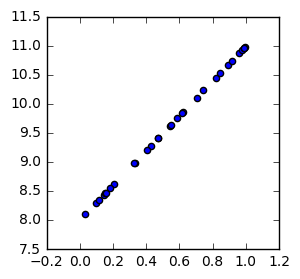

In [7]:
plt.scatter(x,y)

In [8]:
def sse(y,y_pred): 
    """Sum of squared errors"""
    return ((y-y_pred)**2).sum()

def loss(y,a,b,x):
    """Loss function (= sum of squared errors)"""
    return sse(y, lin(a,b,x))

def avg_loss(y,a,b,x):
    """Average loss"""
    return np.sqrt(loss(y,a,b,x)/n)

In [9]:
a_guess=-1.
b_guess=1.
avg_loss(y, a_guess, b_guess, x)

9.2569

In [10]:
lr=0.01
# d[(y-(a*x+b))**2,b] = 2 (b + a x - y)      = 2 (y_pred - y)
# d[(y-(a*x+b))**2,a] = 2 x (b + a x - y)    = x * dy/db

In [11]:
a_guess_hist = []
b_guess_hist = []
dyda_hist = []
dydb_hist = []
def upd():
    global a_guess, b_guess
    y_pred = lin(a_guess, b_guess, x)
    dydb = 2 * (y_pred - y)
    dyda = x*dydb
    a_guess -= lr*dyda.mean()
    b_guess -= lr*dydb.mean()
    dydb_hist.append(dydb.mean())
    dyda_hist.append(dyda.mean())
    a_guess_hist.append(a_guess)
    b_guess_hist.append(b_guess)


In [43]:
fig = plt.figure(dpi=100, figsize=(5, 4))
plt.scatter(x,y)
line, = plt.plot(x,lin(a_guess,b_guess,x))
plt.close()

def animate(i):
    line.set_ydata(lin(a_guess,b_guess,x))
    for i in range(10): upd()
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(0, 40), interval=100)
ani

In [44]:
a_guess_hist[:10]

[-0.0715,
 0.6263,
 1.1510,
 1.5457,
 1.8430,
 2.0671,
 2.2362,
 2.3641,
 2.4610,
 2.5346]

In [45]:
b_guess_hist[:10]

[2.7830,
 4.1204,
 5.1236,
 5.8759,
 6.4400,
 6.8627,
 7.1795,
 7.4167,
 7.5943,
 7.7270]

In [46]:
dyda_hist[:10]

[-9.2846,
 -6.9781,
 -5.2470,
 -3.9478,
 -2.9726,
 -2.2407,
 -1.6912,
 -1.2787,
 -0.9690,
 -0.7365]